## AMES-TOX KNN with feature selection

### the real test is 85% accuracy 

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [72]:
df = pd.read_csv('D:/ML_Pyton_course/ML_Python/project/datasets/ames_datapreprocessing_knime.csv')
df.head()

,Unnamed: 0,AmesResult,Structure,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,C,[Na+].[Na+].CC1(C)SC2C(NC(=O)C(C([O-])=O)C3=CS...,-8.11340,85.0967,207.568628,129.67,428.399,428.008867,8,...,0,1,2,0,0,0,0,0,2,1
1,1,C,FC(F)(F)C1=CC(N\N=C2/C(=O)C(=CC3=CC=CC=C23)C(=...,11.17980,225.8008,365.430948,141.12,930.476,928.036083,10,...,0,0,0,7,0,0,0,0,4,2
2,2,C,CNC(=O)\C=C(/C)OP(=O)(OC)OC,1.05370,50.5332,82.840931,73.86,223.165,223.060959,6,...,0,0,0,0,0,0,0,0,0,0
3,3,C,CC(C)NC(=O)N1CC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,2.88000,79.7177,131.140795,69.72,330.171,329.033397,6,...,0,0,1,1,0,0,0,0,0,0
4,4,C,C\C(CC\C=C(\C)C1CC(=O)C(C)(C)O1)=C/CC1=C(O)C(C...,5.22402,113.9341,176.578705,83.83,420.933,420.170352,5,...,0,0,1,1,0,0,0,0,0,0


In [73]:
df.shape

(12138, 122)

In [74]:
#df.isnull().sum()

In [75]:
df.AmesResult.unique()

array(['C', 'A', 'B', nan], dtype=object)

In [76]:
df_original = df
df = df_original.dropna()
print(df_original.shape[0] - df.shape[0])
df.isna().sum()

6


Unnamed: 0                     0
AmesResult                     0
Structure                      0
SlogP                          0
SMR                            0
LabuteASA                      0
TPSA                           0
AMW                            0
ExactMW                        0
NumLipinskiHBA                 0
NumLipinskiHBD                 0
NumRotatableBonds              0
NumHBD                         0
NumHBA                         0
NumAmideBonds                  0
NumHeteroAtoms                 0
NumHeavyAtoms                  0
NumAtoms                       0
NumStereocenters               0
NumUnspecifiedStereocenters    0
NumRings                       0
NumAromaticRings               0
NumSaturatedRings              0
NumAliphaticRings              0
NumAromaticHeterocycles        0
NumSaturatedHeterocycles       0
NumAliphaticHeterocycles       0
NumAromaticCarbocycles         0
NumSaturatedCarbocycles        0
NumAliphaticCarbocycles        0
          

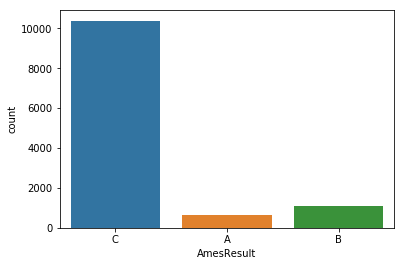

In [77]:
sns.countplot('AmesResult', data=df)

In [78]:
X = df.iloc[0: , 3:]
y = df.AmesResult

### Feature selection

#### Removing features with low variance & Z score normalization

In [79]:
print(X.var())

SlogP                             13.150105
SMR                             2571.265016
LabuteASA                       7769.304387
TPSA                            5060.115434
AMW                            42785.705062
ExactMW                        42688.004538
NumLipinskiHBA                    20.755586
NumLipinskiHBD                     2.966360
NumRotatableBonds                 29.937663
NumHBD                             2.239807
NumHBA                            17.877152
NumAmideBonds                      0.649441
NumHeteroAtoms                    36.821770
NumHeavyAtoms                    193.149134
NumAtoms                         645.384210
NumStereocenters                   3.711505
NumUnspecifiedStereocenters        0.942543
NumRings                           2.871796
NumAromaticRings                   2.240270
NumSaturatedRings                  0.707255
NumAliphaticRings                  0.960346
NumAromaticHeterocycles            0.335742
NumSaturatedHeterocycles        

In [80]:
treshold = 5
sel = VarianceThreshold(threshold=treshold).fit(X)

In [81]:
mask = sel.get_support() 

In [82]:
retained_columns = X.columns[mask]    
print(retained_columns)

Index(['SlogP', 'SMR', 'LabuteASA', 'TPSA', 'AMW', 'ExactMW', 'NumLipinskiHBA',
       'NumRotatableBonds', 'NumHBA', 'NumHeteroAtoms', 'NumHeavyAtoms',
       'NumAtoms', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'Chi1n',
       'Chi2n', 'Chi3n', 'kappa1', 'kappa2', 'kappa3', 'slogp_VSA1',
       'slogp_VSA2', 'slogp_VSA3', 'slogp_VSA4', 'slogp_VSA5', 'slogp_VSA6',
       'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10', 'slogp_VSA11', 'slogp_VSA12',
       'smr_VSA1', 'smr_VSA3', 'smr_VSA4', 'smr_VSA5', 'smr_VSA6', 'smr_VSA7',
       'smr_VSA9', 'smr_VSA10', 'peoe_VSA1', 'peoe_VSA2', 'peoe_VSA3',
       'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA6', 'peoe_VSA7', 'peoe_VSA8',
       'peoe_VSA9', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA12', 'peoe_VSA13',
       'peoe_VSA14', 'MQN1', 'MQN2', 'MQN10', 'MQN12', 'MQN13', 'MQN16',
       'MQN17', 'MQN19', 'MQN20', 'MQN21', 'MQN26', 'MQN27', 'MQN30', 'MQN31'],
      dtype='object')


In [83]:
X_low_var = sel.transform(X)

In [84]:
X_low_var.shape

(12132, 70)

In [85]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler().fit(X_low_var)
#print(scaler.mean_)

X_low_var_Z = scaler.transform(X_low_var)
X_low_var_Z[:3,:]

array([[-2.98997607e+00,  2.64027508e-04,  7.82265708e-01,
         8.41004976e-01,  4.49109932e-01,  4.49923634e-01,
         6.87057223e-01, -9.32087458e-02,  8.61451537e-01,
         9.06920071e-01,  3.18384284e-01, -3.72460641e-02,
         7.69587350e-01,  2.22930923e-01,  5.46538962e-01,
         6.49327575e-01,  7.60135930e-01,  2.83169807e-02,
         2.32104887e-01,  2.73427905e-01,  6.24669991e-01,
         2.64570810e-01, -2.89907181e-02,  2.67138605e+00,
         8.32674490e-01,  6.78568523e-01, -6.68144948e-01,
        -1.51909063e-01, -4.64510334e-01, -2.70627124e-01,
        -4.33787116e-01, -4.91847633e-01, -5.17177848e-01,
         1.34492226e+00,  1.98226700e+00,  9.50294765e-01,
        -5.53953889e-01,  2.70046783e-01, -8.72062028e-01,
        -4.61213657e-01, -5.97869563e-01,  1.13433473e+00,
         1.59212187e+00,  7.16768378e-01, -6.35447351e-01,
         5.98641190e-01,  1.60517340e+00, -8.95321263e-01,
         1.56361380e-01, -6.28709505e-01,  5.20071223e-0

#### corr matrix

In [65]:
corr_matrix = X.corr()

# print(corr_matrix)
#for column in corr_matrix.columns:
    #col_data = corr_matrix[column]
    # print(column)
    
    #for value in col_data:
       # if abs(value) >0.8:
            # print(value)
            
# как да използвам селектираните features в модел
# как да ги запиша в променлива

#### Best first selection with min-max normalization for negative values

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler().fit(X)
print(scaler)

X_scaler = scaler.transform(X)
X_scaler[:3,:]

MinMaxScaler(copy=True, feature_range=(0, 1))


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.35779367, 0.16378048, 0.21494043, 0.11662649, 0.16909519,
        0.16902888, 0.11764706, 0.0212766 , 0.05494505, 0.0212766 ,
        0.11764706, 0.18181818, 0.17647059, 0.15625   , 0.11875   ,
        0.05633803, 0.16666667, 0.125     , 0.07692308, 0.08333333,
        0.08333333, 0.16666667, 0.08333333, 0.08333333, 0.        ,
        0.        , 0.        , 0.46666667, 0.2173685 , 0.16800951,
        0.13677936, 0.05439869, 0.03019835, 0.13734939, 0.14839633,
        0.1335059 , 0.13974515, 0.60944665, 0.17905713, 0.11224504,
        0.00581197, 0.22105881, 0.06993718, 0.09370481, 0.        ,
        0.07034915, 0.0503114 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10357256, 0.23607952, 0.        ,
        0.1314183 , 0.        , 0.08964952, 0.        , 0.05812483,
        0.        , 0.        , 0.19630691, 0.08820714, 0.11764706,
        0.        , 0.06455418, 0.16032386, 0.        , 0.12437411,
        0.02955833, 0.07072876, 0.05916105, 0.  

In [59]:
from sklearn.feature_selection import SelectKBest, chi2
X.shape

(12132, 119)

In [68]:
X_Best_first = SelectKBest(chi2, k=10).fit_transform(X_scaler, y)
X_Best_first.shape

(12132, 10)

## KNN model

#### KNN model with Removing features with low variance & Z score normalization

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
X_low_var_Z, y, random_state=4,test_size = 0.25)

In [90]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [91]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

441

In [92]:
knn.score(X_test,y_test)

0.8545994065281899

#### KNN model with Best first selection with min-max normalization for negative values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
X_Best_first, y, random_state=4,test_size = 0.25)

In [94]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [95]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

446

In [96]:
knn.score(X_test,y_test)

0.8529508737223871